# Scikit-MAAD toolbox for Python

## How to install Python

If Python is not installed on your computer, an easy way is to install the popular Anaconda environment (https://anaconda.org/). It comes with the popular tools :
   * Spyder : IDE for Python
   * Jupyter : which let you create interactive notebooks.
   and the popular packages such as :
   * numpy, scipy, matplolib, bokeh, pylab, pandas, scikit-leanr, scikit-image...
    
A light version of Anaconda exists, it's called Miniconda (https://conda.io/miniconda.html). You need to install manually all the tools and packages :
* Install Spyder : `conda install -c anaconda spyder=3.2.8`
* Install Scikit-image (this will install of the other usefull packages : numpy, scipy, matplotlib, pylab…): `conda install -c anaconda scikit-image=0.13.1`
* Install Scikit-learn (for machine learning) : `conda install -c anaconda scikit-learn=0.19.1` 
* Install Pandas (for data exploration and tables management) : `conda install -c anaconda pandas=0.19.1`
* Install Jupyter (notebook): `conda install -c conda-forge jupyter`. To run Jupyter in the selected directory, run this command in a terminal (for windows, select the terminal anaconda) : `jupyter notebook --notebook-dir="D://chemin//du//repertoire"`

For Matlab users, there is a Thesaurus Matlab <=> Python : http://mathesaurus.sourceforge.net/matlab-numpy.html (import pylab in your python script with `from pylab import *` in order to use directly the functions in the thesaurus)

__________

## How to install the package scikit-MAAD 

To be done

### aide en ligne pour les packages
Doc général de Python https://docs.python.org/3.5/search.html
- matplotlib : http://matplotlib.org/devel/index.html#developers-guide-index
- scipy: https://scipy.org/scipylib/index.html
- numpy: https://docs.scipy.org/doc/numpy/reference/routines.html
- scikit-image : http://scikit-image.org/docs/dev/index.html

Créer un package
* Instructions du lien pour créer un package et le distribuer : https://packaging.python.org/tutorials/packaging-projects/
* Instructions pour créer une hierarchie correct dans un package : https://docs.python.org/3/tutorial/modules.html#packages
* Super lien https://wiki.labomedia.org/index.php/Cr%C3%A9er_son_propre_package_python
____________

## How to use MAAD

This document describes the purpose of MAAD and how to use it step by step
### 1. Setup the environment 
    * clear all the variables
    * load all the modules
    * change the path
    * close all the figures

In [13]:
# Clear all the variables 
from IPython import get_ipython
get_ipython().magic('reset -sf')
 
# =============================================================================
# Load the modules
# =============================================================================

#from pylab import *  # import all common tools from librarie such as numpy, matplotlib and scipy.
import matplotlib.pyplot as plt

# Import MAAD modules   
import sys
sys.path.append('D:\\mes_projets\\2018\\_TOOLBOX\\Python\\scikit-maad') 
import maad

# for csv
import pandas as pd

# change the path to the current path where the script is
import os
# Get the current dir of the current file
dir_path = os.path.dirname(os.path.realpath('__file__'))
os.chdir(dir_path)

# Close all the figures (like in Matlab)
plt.close('all')

### 2. Load sound and preprocess sound
Load the file that will be processed. If you want to see the audiogram, `display=True`

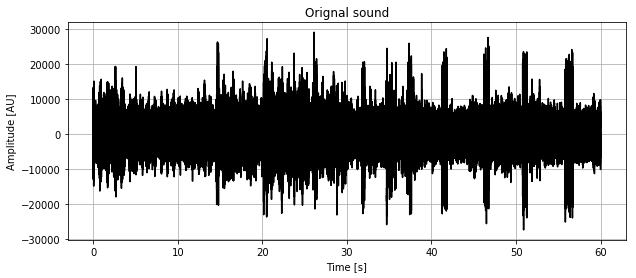

In [14]:
filename = "D:\\mes_projets\\2018\\_TOOLBOX\\Python\\scikit-maad\\data\\demo.wav"
# Load the original sound
s,fs = maad.sound.load(filename=filename, channel="left", display=True)

Filter the sound between Low frequency cut (lfc) and High frequency cut (hlc)

Highpass filtering in progress...


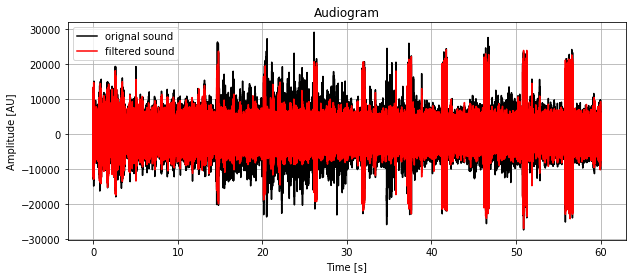

In [15]:
s_filt = maad.sound.select_bandwidth(s, fs, lfc=250, hfc=None, order=1, display=True)

Compute the spectrogram of the sound. The spectrogram function needs the audiogram (s_filt), its sampling frequency (fs), the number of points per segment (nperseg) which is the window length that is used to compute the short fourrier transform. It determines the frequency and time resolution. A large number increases the frequency resolution but inversally decreases the time resolution. The % of overlapping (overlap) determines the overlapping of each window.
>**Important** : The spectrogram is in db scale by default (the parameter `db_floor` set the minimum db value). If you want to have the spectrogram in linear scale, change the value of `db_floor=0`  

In [12]:
Sxx,tn,fn,ext = maad.sound.spectrogram(s_filt, fs, nperseg=2048, overlap=0.5, db_floor=-60, display=False)
dt = tn[1]-tn[0] # Time resolution of the spectrogram
df = fn[1]-fn[0] # Frequency resolution of the spectrogram

>**Important** : the spectrogram needs to be rescale between 0 to 1 before image processing

In [ ]:
im_ref = maad.util.linear_scale(Sxx, minval= 0.0, maxval=1.0)